In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
headers = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
data = pd.read_csv('/content/drive/MyDrive/bigdata_projects/1994 Census Income/data/adult.csv',sep=',',names=headers)

data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Preproccessing operations

### work place encoder

In [ ]:
# get the categorical columns
# transform it by set the object of categories with reference

work_obj = {
    ' Private':0,
    ' Self-emp-not-inc':1,
    ' Self-emp-inc':2,
    ' Federal-gov':3,
    ' Local-gov':4,
    ' State-gov':5,
    ' Without-pay':6,
    ' Never-worked':7,
    'unknown':8
}

workclasses = data.iloc[:,1:2].values

for i in range(len(workclasses)):
    if workclasses[i] == ' ?':
      workclasses[i] = 'unknown'
    
    workclasses[i] = work_obj[workclasses[i][0]]

### education encoder 

In [106]:
education = data.iloc[:,3:4].values

education_obj = {
    ' Bachelors':0,
    ' Some-college':1,
    ' 11th':2,
    ' HS-grad':3,
    ' Prof-school':4,
    ' Assoc-acdm':5,
    ' Assoc-voc':6,
    ' 9th':7,
    ' 7th-8th':8,
    ' 12th':9,
    ' Masters':10,
    ' 1st-4th':11,
    ' 10th':12,
    ' Doctorate':13,
    ' 5th-6th':14,
    ' Preschool':15,
    'unknown':16
}

for i in range(len(education)):
  if workclasses[i] == ' ?':
      workclasses[i] = 'unknown'
  education[i] = education_obj[education[i][0]]


### occupation encoder

In [107]:
occupation = data.iloc[:,6:7].values

occupation_obj = {
    ' Tech-support':0,
    ' Craft-repair':1,
    ' Other-service':2,
    ' Sales':3,
    ' Exec-managerial':4,
    ' Prof-specialty':5,
    ' Handlers-cleaners':6,
    ' Machine-op-inspct':7,
    ' Adm-clerical':8,
    ' Farming-fishing':9,
    ' Transport-moving':10,
    ' Priv-house-serv':11,
    ' Protective-serv':12,
    ' Armed-Forces':13,
    'unknown':14
}

for i in range(len(occupation)):
  if occupation[i] == ' ?':
      occupation[i] = 'unknown'
  occupation[i] = occupation_obj[occupation[i][0]]

### sex encoder

In [108]:
gender = data.iloc[:,9:10].values

gender_obj = {
    ' Female':0,
    ' Male':1
}

for i in range(len(gender)):
  gender[i] = gender_obj[gender[i][0]]

### Salary encoding

In [ ]:
salary = data.iloc[:,-1:].values

salary_obj = {
    ' <=50K':1,
    ' >50K':0
}

for i in range(len(salary)):
  salary[i] = salary_obj[salary[i][0]]

## Bulding the model

In [163]:
# recreate the dataframe with the required columns
# not all columns is important

age = data.iloc[:,:1].values
fnlwgt = data.iloc[:,2:3].values
education_num = data.iloc[:,4:5].values
capital_gain = data.iloc[:,10:11].values
capital_loss = data.iloc[:,11:12].values
hours_per_week = data.iloc[:,12:13].values

feature_array = np.concatenate((age,workclasses,education,education_num,occupation,gender,capital_gain,capital_loss,hours_per_week),axis=1)


# cols = ['age','workclasses','fnlwgt','education','education_num','occupation','gender','capital_gain','capital_loss','hours-per-week']
# final_data = pd.DataFrame(feature_array,columns=cols)

# final_data

In [164]:
# split training and test 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(feature_array,salary,test_size=0.33,random_state=0)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

## KNN Model

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[1 0 1 ... 1 0 1]
[[1532 1063]
 [1176 6975]]
Precision Score = 0.867753172430953


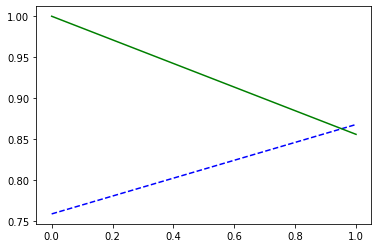

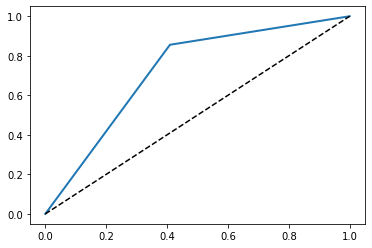

In [165]:
""" ########### Model ########### """
from sklearn.neighbors import KNeighborsClassifier
# confusion matrixs
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1,metric='minkowski')

knn.fit(x_train,y_train)

pred = knn.predict(x_test)
print(pred)
# confusion matrix
cm = confusion_matrix(y_test,pred)
print(cm)

# Precision
from sklearn.metrics import precision_score
ps = precision_score(y_test,pred)
print(f'Precision Score = {ps}')

## ploting 
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")

plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.show()

#ROC

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, linewidth=2, label='ROC')
plt.plot([0, 1], [0, 1], 'k--') 
plt.show()

## Decision Tree Classifier

[1 0 1 ... 1 0 1]
[[1521 1074]
 [1117 7034]]
Precision Score = 0.8675382338431179


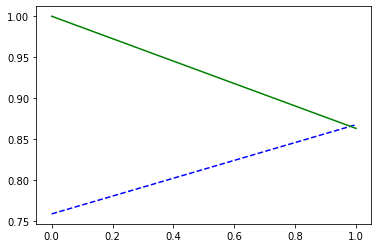

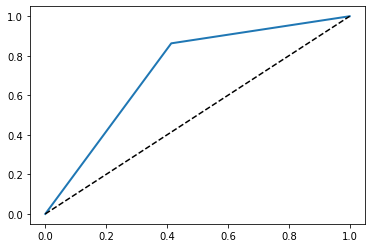

In [166]:
from sklearn.tree import DecisionTreeClassifier
# confusion matrixs
from sklearn.metrics import confusion_matrix
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
pred = dtc.predict(x_test)

print(pred)
cm = confusion_matrix(y_test,pred)
print(cm)

# Precision
from sklearn.metrics import precision_score
ps = precision_score(y_test,pred)
print(f'Precision Score = {ps}')

## ploting 
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")

plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.show()

#ROC

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, linewidth=2, label='ROC')
plt.plot([0, 1], [0, 1], 'k--') 
plt.show()

## GaussianNB

[1 1 1 ... 1 1 1]
[[ 827 1768]
 [ 377 7774]]
Precision Score = 0.8147138964577657


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


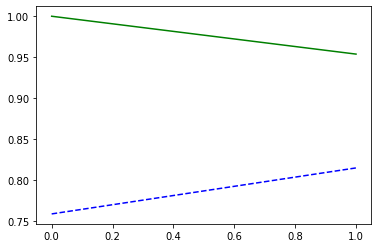

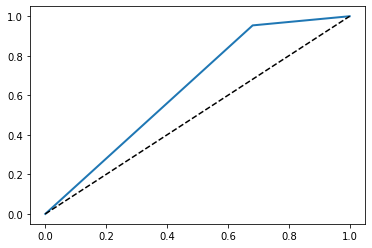

In [167]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(x_train,y_train)

pred = gnb.predict(x_test)

print(pred)
cm = confusion_matrix(y_test,pred)
print(cm)

# Precision
from sklearn.metrics import precision_score
ps = precision_score(y_test,pred)
print(f'Precision Score = {ps}')

## ploting 
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")

plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.show()

#ROC

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, linewidth=2, label='ROC')
plt.plot([0, 1], [0, 1], 'k--') 
plt.show()